# 1. Making our custom performance metric

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(X)
y = pd.Series(y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# percentage of benign(0) and malignant(1) tumors

y.value_counts(normalize=True).round(2)

0    0.63
1    0.37
Name: proportion, dtype: float64

# 2. Confusion Matrix

# 3. False Negative Rate

In [4]:
# we want to minimize the number of false negative cases

def fnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    FNR = fn / (tp + fn)
    return FNR

In [5]:
fnr_score = make_scorer(
    fnr,
    greater_is_better=False,
    needs_proba=False)

In [6]:
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=1, random_state=0, n_jobs=4)

In [7]:
rf_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500, 1000, 2000],
    'max_depth': [1, 2, 3, 4],
    
}

clf = GridSearchCV(
    rf_model,
    rf_param_grid,
    scoring=fnr_score,
    cv=5)

search = clf.fit(X, y)

search.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [8]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

results.head()

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",-0.164563,0.068712
1,"{'max_depth': 1, 'n_estimators': 20}",-0.159801,0.073267
2,"{'max_depth': 1, 'n_estimators': 50}",-0.178627,0.068895
3,"{'max_depth': 1, 'n_estimators': 100}",-0.145404,0.085822
4,"{'max_depth': 1, 'n_estimators': 200}",-0.140642,0.082462


In [9]:
results

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",-0.164563,0.068712
1,"{'max_depth': 1, 'n_estimators': 20}",-0.159801,0.073267
2,"{'max_depth': 1, 'n_estimators': 50}",-0.178627,0.068895
3,"{'max_depth': 1, 'n_estimators': 100}",-0.145404,0.085822
4,"{'max_depth': 1, 'n_estimators': 200}",-0.140642,0.082462
5,"{'max_depth': 1, 'n_estimators': 500}",-0.140642,0.086489
6,"{'max_depth': 1, 'n_estimators': 1000}",-0.150055,0.088251
7,"{'max_depth': 1, 'n_estimators': 2000}",-0.145404,0.080364
8,"{'max_depth': 2, 'n_estimators': 10}",-0.121927,0.073512
9,"{'max_depth': 2, 'n_estimators': 20}",-0.103433,0.034071


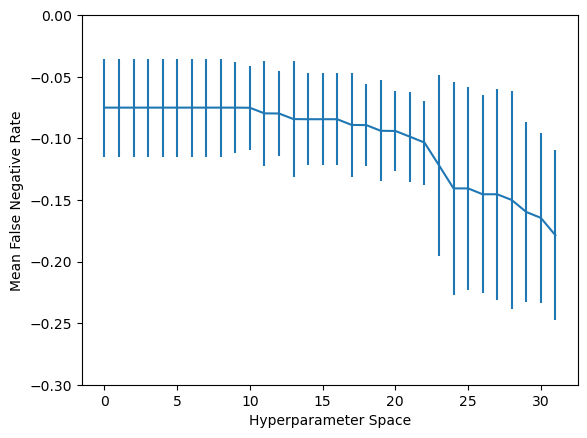

In [10]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylim(-0.3, 0)
plt.ylabel('Mean False Negative Rate')
plt.xlabel('Hyperparameter Space')

plt.show()

# 4. Scoring Function that needs probability

In [11]:
def fnr_prob(y_true, y_pred):
    y_pred_class = np.where(y_pred > 0.37, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_class, labels=[0, 1]).ravel()
    FNR = fn / (tp + fn)
    return FNR

In [12]:
fnr_score_prob = make_scorer(
    fnr_prob,
    greater_is_better=False,
    needs_proba=True)

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0, n_jobs=-1)

rf_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200, 500, 1000, 2000],
    max_depth=[1, 2, 3, 4])

clf = GridSearchCV(rf_model, rf_param_grid, scoring=fnr_score_prob, cv=7)


search = clf.fit(X, y)

search.best_params_

{'max_depth': 4, 'n_estimators': 20}

In [14]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

results.head()

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",-0.070814,0.051009
1,"{'max_depth': 1, 'n_estimators': 20}",-0.061137,0.053252
2,"{'max_depth': 1, 'n_estimators': 50}",-0.065591,0.071031
3,"{'max_depth': 1, 'n_estimators': 100}",-0.084485,0.078649
4,"{'max_depth': 1, 'n_estimators': 200}",-0.084485,0.076604


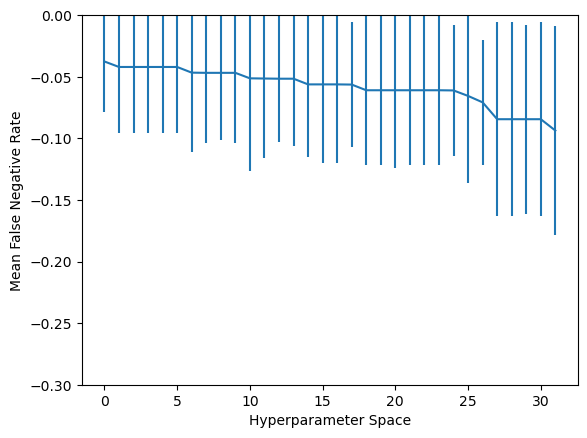

In [15]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylim(-0.3, 0)
plt.ylabel('Mean False Negative Rate')
plt.xlabel('Hyperparameter Space')

plt.show()